In [2]:
import pandas as pd
import numpy as np
import scipy
#import xlrd
#import openpyxl 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import open3d as o3d
import trimesh

ImportError: DLL load failed while importing _multiarray_umath: Le module spécifié est introuvable.

ImportError: numpy._core.multiarray failed to import

In [6]:
# generate 3D mesh cylinder for example
radius = 4.0
height = 20.0
segments = 200  # Number of segments around the cylinder

# Generate the cylinder
cylinder = trimesh.creation.cylinder(radius=radius, height=height, sections=segments)

# Remove one cap (e.g., the bottom cap)
all_face = [x for x in range(0,4*segments)]
under_face = [4*x for x in range(0,segments)] # [0,4,8,12,16,20,40,60,80,100,120,140,160,180]
open_cylinder = trimesh.Trimesh(vertices=cylinder.vertices, faces=cylinder.faces[[x for x in all_face if (x not in under_face)]])

# Save the mesh to a file if needed
open_cylinder.export('open_cylinder.stl');

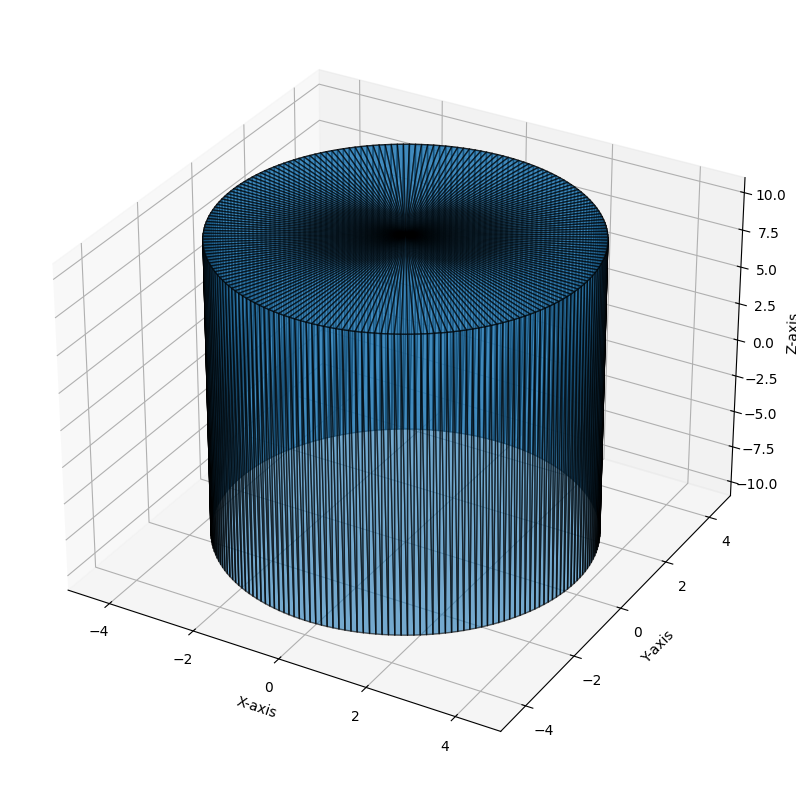

In [7]:
mesh = trimesh.load('open_cylinder.stl')
# Visualize

# Create a plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the cylinder
mesh = open_cylinder
ax.add_collection3d(Poly3DCollection(mesh.triangles, alpha=0.6, edgecolor='k'))

# Set axes limits
vertices = mesh.vertices
ax.set_xlim(vertices[:, 0].min() - 1, vertices[:, 0].max() + 1)
ax.set_ylim(vertices[:, 1].min() - 1, vertices[:, 1].max() + 1)
ax.set_zlim(vertices[:, 2].min() - 1, vertices[:, 2].max() + 1)

# Add axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()


#open_cylinder.show()

#import pyglet
#from trimesh.viewer import windowed

#scene = trimesh.Scene([mesh])
#viewer = trimesh.viewer.windowed.SceneViewer(scene, flags='wireframe')
#viewer.show()

In [ ]:
distribution = pd.read_csv("distribution_map.csv")
distribution

In [11]:
height_plane = 2
plane_origin = [0, 0, height_plane]
plane_normal = [0, 0, 1]

#section = trimesh.intersections.mesh_plane(mesh, plane_normal, plane_origin, return_faces=False, local_faces=None, cached_dots=None)
section = open_cylinder.section(plane_origin=plane_origin, plane_normal=plane_normal)
circle_coords = section.to_planar()
circle_coords_3d = section.vertices

plt.figure(figsize=(6, 6))
plt.plot(circle_coords[:, 0], circle_coords[:, 1], '-o', label="Intersection Circle")
plt.axis('equal')
plt.title("Intersection Circle in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'scipy'